In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

79.02318680513457 125.33113612759826
-61.605104132595876 -125.80226659726492
-75.08863127195602 -8.712605540514886
-63.40052250076599 -136.70210327551106
-4.39433541512966 -20.559492889853402
14.73604488564402 10.538598992589272
72.23455069559705 68.28532832061197
-82.42452927012636 42.27031659797035
-20.198127417099556 -38.75560200728481
67.14503660499332 -158.2413101599882
-70.18472283408998 -96.78425511078913
56.26548701427893 52.541232410036145
71.44402323785181 -10.806346476704533
10.515188774908921 179.99524910666304
-16.799048786703324 153.6444425998689
66.12266772941106 -97.20645825530502
13.519047510646573 -158.26231276647133
-69.53416655861106 175.17400504284916
-46.24073835520431 -64.5300769371798
-88.48227678099417 -107.4287944469108
-59.9422107326451 129.8031690926581
-16.495624878862202 -52.00634688297832
0.572917416724664 -95.10518126285064
-56.569644616669756 -68.29635297786056
-86.36261895802957 -176.97345145994962
21.03540424000225 33.95815988838547
81.02782331986472 

-20.30284526497249 -85.6014770264899
-20.04541855937599 62.33362666499809
29.837718816577464 -109.43202097169798
3.724089602542378 84.00684109223295
50.43275879893196 129.57168916620788
-45.08224432967187 109.55528370813755
-68.39702112460654 16.336970612485175
-1.5652779936521597 32.15817317492821
3.9728168667287633 155.81208144475022
-59.658330252856125 171.7860799901536
86.13534096751977 34.7742398781925
-47.462060478518055 76.13838377374424
88.46630384644678 -156.4240371699645
46.833380025563315 -84.63291431197565
15.010483425317275 -145.85461534260332
-71.38107012512577 178.1726315029669
-7.700207417442741 -12.784589451519963
-73.88992555931381 14.30289286024572
73.77814533673 23.6799959262315
-4.912222326495339 -93.48440929882827
-26.925352302173707 109.04408798474492
-56.1090413543964 -31.167353842488296
27.50254677605828 144.67009576144875
-28.82573134822377 -176.21915597772463
-77.44920788401461 -162.345467354913
89.16532897482213 4.04719842200663
32.60917745070043 151.8910734

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0436510e6ee5d86c5c17d1d1e5c040b5


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0436510e6ee5d86c5c17d1d1e5c040b5&q=Boston


In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 66.56,
  'feels_like': 67.39,
  'temp_min': 64.18,
  'temp_max': 68.83,
  'pressure': 1022,
  'humidity': 95},
 'visibility': 402,
 'wind': {'speed': 5.75, 'deg': 120},
 'clouds': {'all': 90},
 'dt': 1626263206,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1626254399,
  'sunset': 1626308391},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [14]:
##an alternative way to iterate through the list of cities and retrieve both the index(using enumerate), and the city from the list,
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities by using try and error.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | goure
Processing Record 6 of Set 1 | aksarka
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | linhares
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | alnashi
Processing Record 12 of Set 1 | hofn
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | mackay
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | kaitangata
Processing Record 18 of Set 1 | comodoro rivadavia
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | piranhas
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | vaini
Processing Record 24 of Set 1 | barbar
City not found. Skipp

Processing Record 39 of Set 4 | mayumba
Processing Record 40 of Set 4 | vestmanna
Processing Record 41 of Set 4 | pochutla
Processing Record 42 of Set 4 | chara
Processing Record 43 of Set 4 | yanan
City not found. Skipping...
Processing Record 44 of Set 4 | novichikha
Processing Record 45 of Set 4 | san vicente
Processing Record 46 of Set 4 | solsona
Processing Record 47 of Set 4 | gat
Processing Record 48 of Set 4 | kutum
Processing Record 49 of Set 4 | mulege
Processing Record 50 of Set 4 | haines junction
Processing Record 1 of Set 5 | walvis bay
Processing Record 2 of Set 5 | east london
Processing Record 3 of Set 5 | moree
Processing Record 4 of Set 5 | wah
Processing Record 5 of Set 5 | saint-pierre
Processing Record 6 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 7 of Set 5 | portland
Processing Record 8 of Set 5 | kavaratti
Processing Record 9 of Set 5 | alexandria
Processing Record 10 of Set 5 | husavik
Processing Record 11 of Set 5 | vostok
Processing 

Processing Record 29 of Set 8 | nabire
Processing Record 30 of Set 8 | venice
Processing Record 31 of Set 8 | fairbanks
Processing Record 32 of Set 8 | antalaha
Processing Record 33 of Set 8 | fort nelson
Processing Record 34 of Set 8 | linxia
Processing Record 35 of Set 8 | kasangulu
Processing Record 36 of Set 8 | najran
Processing Record 37 of Set 8 | mitu
Processing Record 38 of Set 8 | swan hill
Processing Record 39 of Set 8 | ust-kuyga
Processing Record 40 of Set 8 | bintulu
Processing Record 41 of Set 8 | srivardhan
Processing Record 42 of Set 8 | cidreira
Processing Record 43 of Set 8 | cabedelo
Processing Record 44 of Set 8 | semey
Processing Record 45 of Set 8 | callaway
Processing Record 46 of Set 8 | nongstoin
Processing Record 47 of Set 8 | finschhafen
Processing Record 48 of Set 8 | qasigiannguit
Processing Record 49 of Set 8 | egvekinot
Processing Record 50 of Set 8 | kyabe
Processing Record 1 of Set 9 | juneau
Processing Record 2 of Set 9 | high level
Processing Record 

Processing Record 19 of Set 12 | panaba
Processing Record 20 of Set 12 | victor harbor
Processing Record 21 of Set 12 | nha trang
Processing Record 22 of Set 12 | kautokeino
Processing Record 23 of Set 12 | koungou
Processing Record 24 of Set 12 | olga
Processing Record 25 of Set 12 | san francisco
Processing Record 26 of Set 12 | zhangye
Processing Record 27 of Set 12 | kimparana
Processing Record 28 of Set 12 | vestmannaeyjar
Processing Record 29 of Set 12 | anchorage
Processing Record 30 of Set 12 | sorvag
City not found. Skipping...
Processing Record 31 of Set 12 | sapao
City not found. Skipping...
Processing Record 32 of Set 12 | gisborne
Processing Record 33 of Set 12 | karratha
Processing Record 34 of Set 12 | aviles
Processing Record 35 of Set 12 | kidal
Processing Record 36 of Set 12 | aragats
Processing Record 37 of Set 12 | mbini
Processing Record 38 of Set 12 | vilyuysk
Processing Record 39 of Set 12 | acapulco
Processing Record 40 of Set 12 | temuco
Processing Record 41 of

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.6872,128.8694,45.70,62,98,12.82,RU,2021-07-14 11:48:15
1,Rikitea,-23.1203,-134.9692,72.81,72,15,9.19,PF,2021-07-14 11:48:16
2,Cape Town,-33.9258,18.4232,59.11,65,75,1.99,ZA,2021-07-14 11:48:16
3,Georgetown,5.4112,100.3354,84.15,73,20,5.01,MY,2021-07-14 11:47:04
4,Goure,13.9835,10.2704,97.99,29,9,6.85,NE,2021-07-14 11:48:16
5,Aksarka,66.5606,67.7975,63.36,38,13,4.09,RU,2021-07-14 11:48:16
6,Port Alfred,-33.5906,26.8910,62.60,35,25,11.52,ZA,2021-07-14 11:48:17
7,Linhares,-19.3911,-40.0722,75.43,73,22,1.50,BR,2021-07-14 11:48:17
8,Barrow,71.2906,-156.7887,30.22,93,90,6.91,US,2021-07-14 11:48:17
9,Punta Arenas,-53.1500,-70.9167,37.51,87,90,16.11,CL,2021-07-14 11:47:02


In [18]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [19]:
city_data_df = city_data_df[new_column_order]

In [20]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2021-07-14 11:48:15,71.6872,128.8694,45.70,62,98,12.82
1,Rikitea,PF,2021-07-14 11:48:16,-23.1203,-134.9692,72.81,72,15,9.19
2,Cape Town,ZA,2021-07-14 11:48:16,-33.9258,18.4232,59.11,65,75,1.99
3,Georgetown,MY,2021-07-14 11:47:04,5.4112,100.3354,84.15,73,20,5.01
4,Goure,NE,2021-07-14 11:48:16,13.9835,10.2704,97.99,29,9,6.85
...,...,...,...,...,...,...,...,...,...
565,Laguna,US,2021-07-14 11:51:18,38.4210,-121.4238,67.82,86,1,1.99
566,Natal,BR,2021-07-14 11:47:58,-5.7950,-35.2094,75.85,88,75,10.36
567,Magadan,RU,2021-07-14 11:51:18,59.5667,150.8000,52.74,92,100,20.76
568,Gayeri,BF,2021-07-14 11:51:18,12.6497,0.4931,92.80,40,70,12.15


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


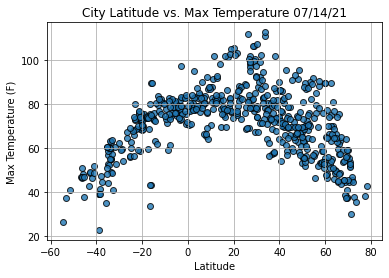

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

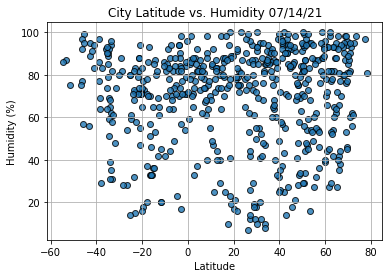

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

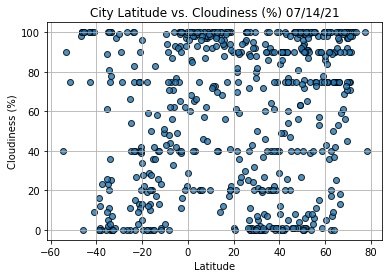

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

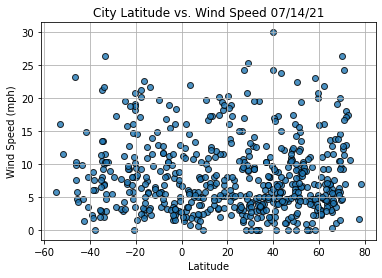

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()